# DATA 606 - DELIVERY 3

In [ ]:
import numpy as np
import pandas as pd

In [176]:
## I usually import things that I could potentially use here.
##They are not always used, but it removes the hassle of importing them later.

import datetime, warnings, scipy 
import seaborn as sns
import matplotlib.patches as mpatches

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit

import csv

#plt.rcParams["patch.force_edgecolor"] = True
#plt.style.use('fivethirtyeight')
#mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
##Reading csv's into pandas df
flightsCSV = pd.read_csv('606_flights.csv')

flightsCSV.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#flightsCSV['WEATHER_DELAY']

In [5]:
#flightsCSV.head(110)

In [6]:
#Combining the YEAR, MONTH, DAY columns to create one DATE column. DAY_OF_WEEK is unnecessary. 

flightsCSV['DATE']=pd.to_datetime(flightsCSV[['YEAR','MONTH','DAY']])
flightsCSV

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31


In [7]:
flightsCSV.dtypes

YEAR                            int64
MONTH                           int64
DAY                             int64
DAY_OF_WEEK                     int64
AIRLINE                        object
FLIGHT_NUMBER                   int64
TAIL_NUMBER                    object
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
SCHEDULED_DEPARTURE             int64
DEPARTURE_TIME                float64
DEPARTURE_DELAY               float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
SCHEDULED_TIME                float64
ELAPSED_TIME                  float64
AIR_TIME                      float64
DISTANCE                        int64
WHEELS_ON                     float64
TAXI_IN                       float64
SCHEDULED_ARRIVAL               int64
ARRIVAL_TIME                  float64
ARRIVAL_DELAY                 float64
DIVERTED                        int64
CANCELLED                       int64
CANCELLATION_REASON            object
AIR_SYSTEM_D

In [8]:
#flightsCSV['Time'],flightsCSV['Date']= flightsCSV['DATE'].apply(lambda x:x.time()), flightsCSV['DATE'].apply(lambda x:x.date())
#flightsCSV.head(10)


In [9]:
#Created a function that converts the 'HHMM' string to datetime.time. 
#i.e. departure time "2354.0" converted to 23:54:00.

def format_HHMM(HHMM):
    if pd.isnull(HHMM):
        return np.nan
    else:
        if HHMM == 2400: HHMM = 0
        HHMM = "{0:04d}".format(int(HHMM))
        formHHMM = datetime.time(int(HHMM[0:2]), int(HHMM[2:4]))
        return formHHMM

In [10]:
#Combines the date and time 
def comb_date_HHMM(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

In [11]:
#creates a dateTime format. this way i can easily read/use the time columns later. 

def create_flight_time(flightsCSV, col):    
    liste = []
    for index, cols in flightsCSV[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(comb_date_HHMM(cols))
        else:
            cols[1] = format_HHMM(cols[1])
            liste.append(comb_date_HHMM(cols))
    return pd.Series(liste)

In [12]:
#transformations to the columns based on the function I created above. 

flightsCSV['SCHEDULED_DEPARTURE'] = create_flight_time(flightsCSV, 'SCHEDULED_DEPARTURE')

flightsCSV['DEPARTURE_TIME'] = flightsCSV['DEPARTURE_TIME'].apply(format_HHMM)
flightsCSV['SCHEDULED_ARRIVAL'] = flightsCSV['SCHEDULED_ARRIVAL'].apply(format_HHMM)
flightsCSV['ARRIVAL_TIME'] = flightsCSV['ARRIVAL_TIME'].apply(format_HHMM)

#first six rows to show the transformations
flightsCSV.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME', 'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


In [14]:
### i had to re-drop columns (this was done in Delivery 2) 
###because I started a new notebook for Delivery 3. 

flightsCSV = flightsCSV.drop(['DAY', 'YEAR', 'MONTH', 'TAXI_IN', 'TAXI_OUT', 'TAIL_NUMBER',
                              'WHEELS_ON', 'WHEELS_OFF', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 
                              'AIR_SYSTEM_DELAY', 'CANCELLATION_REASON'], axis=1)

In [15]:
flightsCSV.head(5)

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,WEATHER_DELAY,DATE
0,4,AS,98,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,169.0,1448,04:30:00,04:08:00,-22.0,0,0,NaN,2015-01-01
1,4,AA,2336,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,263.0,2330,07:50:00,07:41:00,-9.0,0,0,NaN,2015-01-01
2,4,US,840,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,266.0,2296,08:06:00,08:11:00,5.0,0,0,NaN,2015-01-01
3,4,AA,258,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,258.0,2342,08:05:00,07:56:00,-9.0,0,0,NaN,2015-01-01
4,4,AS,135,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,199.0,1448,03:20:00,02:59:00,-21.0,0,0,NaN,2015-01-01


In [ ]:
#flights.dtypes

In [16]:
flightsCSV.shape

(5819079, 19)

In [17]:
##Done in delivery 2.
## filtering to see where cancelled = 1
df_filtered = flightsCSV[flightsCSV['CANCELLED'] >= 1]
df_filtered

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,WEATHER_DELAY,DATE
32,4,AS,136,ANC,SEA,2015-01-01 01:35:00,NaN,NaN,205.0,NaN,NaN,1448,06:00:00,NaN,NaN,0,1,NaN,2015-01-01
42,4,AA,2459,PHX,DFW,2015-01-01 02:00:00,NaN,NaN,120.0,NaN,NaN,868,05:00:00,NaN,NaN,0,1,NaN,2015-01-01
68,4,OO,5254,MAF,IAH,2015-01-01 05:10:00,NaN,NaN,87.0,NaN,NaN,429,06:37:00,NaN,NaN,0,1,NaN,2015-01-01
82,4,MQ,2859,SGF,DFW,2015-01-01 05:25:00,NaN,NaN,95.0,NaN,NaN,364,07:00:00,NaN,NaN,0,1,NaN,2015-01-01
90,4,OO,5460,RDD,SFO,2015-01-01 05:30:00,NaN,NaN,90.0,NaN,NaN,199,07:00:00,NaN,NaN,0,1,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,4,UA,1789,IAH,TPA,2015-12-31 19:55:00,NaN,NaN,125.0,NaN,NaN,787,23:00:00,NaN,NaN,0,1,NaN,2015-12-31
5818157,4,UA,222,SFO,LAX,2015-12-31 20:00:00,NaN,NaN,96.0,NaN,NaN,337,21:36:00,NaN,NaN,0,1,NaN,2015-12-31
5818318,4,AA,2245,MIA,SAN,2015-12-31 20:19:00,NaN,NaN,337.0,NaN,NaN,2267,22:56:00,NaN,NaN,0,1,NaN,2015-12-31
5818777,4,NK,416,FLL,IAG,2015-12-31 21:55:00,NaN,NaN,175.0,NaN,NaN,1176,00:50:00,NaN,NaN,0,1,NaN,2015-12-31


In [18]:
##Done in delivery 2.
## number of rows that should be dropped
df_filtered.shape

(89884, 19)

In [19]:
##Done in delivery 2.
##After ACTUALLY dropping rows
filtered = flightsCSV.drop(flightsCSV[flightsCSV['CANCELLED'] >= 1].index)
filtered.head(210)

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,WEATHER_DELAY,DATE
0,4,AS,98,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,169.0,1448,04:30:00,04:08:00,-22.0,0,0,NaN,2015-01-01
1,4,AA,2336,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,263.0,2330,07:50:00,07:41:00,-9.0,0,0,NaN,2015-01-01
2,4,US,840,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,266.0,2296,08:06:00,08:11:00,5.0,0,0,NaN,2015-01-01
3,4,AA,258,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,258.0,2342,08:05:00,07:56:00,-9.0,0,0,NaN,2015-01-01
4,4,AS,135,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,199.0,1448,03:20:00,02:59:00,-21.0,0,0,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,4,AA,1084,MIA,LGA,2015-01-01 06:00:00,05:58:00,-2.0,175.0,168.0,149.0,1096,08:55:00,08:46:00,-9.0,0,0,NaN,2015-01-01
219,4,AA,1088,LAS,DFW,2015-01-01 06:00:00,05:57:00,-3.0,160.0,170.0,128.0,1055,10:40:00,10:47:00,7.0,0,0,NaN,2015-01-01
220,4,AA,1534,PDX,DFW,2015-01-01 06:00:00,05:56:00,-4.0,225.0,226.0,206.0,1616,11:45:00,11:42:00,-3.0,0,0,NaN,2015-01-01
221,4,AA,1573,TPA,DFW,2015-01-01 06:00:00,05:54:00,-6.0,170.0,156.0,139.0,929,07:50:00,07:30:00,-20.0,0,0,NaN,2015-01-01


In [21]:
#total number of rows after data was dropped.
filtered.shape

(5729195, 19)

In [ ]:
#flightsCSV['Time'],flightsCSV['Date']= flightsCSV['DATE'].apply(lambda x:x.time()), flightsCSV['DATE'].apply(lambda x:x.date())


# Historical Weather Data - World Weather Online

In [1]:
##I used the world weather API to create my weather CSV. 
##i hate to create an account and use an api key.
## api_key = 'b076a48ddee743c9ba0211103200404'

dailyweather = pd.read_csv('DAILY_World_Weather_USA.csv')
dailyweather

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2015-01-01,27,25,0.0,10.2,7,7,72,03:54 PM,03:31 AM,...,26,26,64,84,10.9,1011,27,9,178,17
1,2015-01-02,29,25,0.0,8.8,7,7,80,04:46 PM,04:22 AM,...,27,27,53,75,1.7,1011,29,10,98,19
2,2015-01-03,30,25,0.0,10.2,7,7,87,05:38 PM,05:14 AM,...,27,22,36,77,4.1,1011,30,10,220,15
3,2015-01-04,30,25,0.0,10.2,7,7,94,06:29 PM,06:06 AM,...,27,21,37,78,7.6,1009,30,9,291,14
4,2015-01-05,32,25,0.0,10.2,7,7,100,07:19 PM,06:56 AM,...,28,17,39,78,6.7,1009,32,10,250,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2015-12-27,31,25,0.0,11.6,7,7,87,08:51 PM,08:27 AM,...,28,15,40,79,1.4,1012,31,10,70,10
392,2015-12-28,31,26,0.0,11.6,6,6,79,09:42 PM,09:19 AM,...,28,16,42,78,7.8,1013,31,9,43,10
393,2015-12-29,29,25,0.0,10.2,7,7,72,10:29 PM,10:07 AM,...,27,17,58,82,3.6,1009,29,9,164,12
394,2015-12-30,31,26,0.0,11.6,7,7,65,11:15 PM,10:53 AM,...,28,21,46,75,0.5,1012,31,10,18,15


In [23]:
#renaming column.
#dailyweather.rename(columns={"date_time": "DATE"})

In [24]:
dailyweather.dtypes

date_time             object
maxtempC               int64
mintempC               int64
totalSnow_cm         float64
sunHour              float64
uvIndex                int64
uvIndex.1              int64
moon_illumination      int64
moonrise              object
moonset               object
sunrise               object
sunset                object
DewPointC              int64
FeelsLikeC             int64
HeatIndexC             int64
WindChillC             int64
WindGustKmph           int64
cloudcover             int64
humidity               int64
precipMM             float64
pressure               int64
tempC                  int64
visibility             int64
winddirDegree          int64
windspeedKmph          int64
dtype: object

In [25]:
##converting data type. 
dailyweather['date_time'] = pd.to_datetime(dailyweather['date_time'])

In [26]:
##checking data type
dailyweather.dtypes

date_time            datetime64[ns]
maxtempC                      int64
mintempC                      int64
totalSnow_cm                float64
sunHour                     float64
uvIndex                       int64
uvIndex.1                     int64
moon_illumination             int64
moonrise                     object
moonset                      object
sunrise                      object
sunset                       object
DewPointC                     int64
FeelsLikeC                    int64
HeatIndexC                    int64
WindChillC                    int64
WindGustKmph                  int64
cloudcover                    int64
humidity                      int64
precipMM                    float64
pressure                      int64
tempC                         int64
visibility                    int64
winddirDegree                 int64
windspeedKmph                 int64
dtype: object

In [27]:
#renaming column.
histweather = dailyweather.rename(columns={"date_time": "DATE"})

In [28]:
histweather.dtypes

DATE                 datetime64[ns]
maxtempC                      int64
mintempC                      int64
totalSnow_cm                float64
sunHour                     float64
uvIndex                       int64
uvIndex.1                     int64
moon_illumination             int64
moonrise                     object
moonset                      object
sunrise                      object
sunset                       object
DewPointC                     int64
FeelsLikeC                    int64
HeatIndexC                    int64
WindChillC                    int64
WindGustKmph                  int64
cloudcover                    int64
humidity                      int64
precipMM                    float64
pressure                      int64
tempC                         int64
visibility                    int64
winddirDegree                 int64
windspeedKmph                 int64
dtype: object

In [29]:
## dropping unnecessary columns from the historical weather dataframe. 

histweather = histweather.drop(['sunHour', 'uvIndex', 'uvIndex.1', 'moonrise', 'moonset', 'moon_illumination', 
                     'maxtempC','mintempC', 'sunset', 'sunrise', 'tempC', 'HeatIndexC', 'FeelsLikeC',
                     'humidity',], axis=1)

In [30]:
histweather

,DATE,totalSnow_cm,DewPointC,WindChillC,WindGustKmph,cloudcover,precipMM,pressure,visibility,winddirDegree,windspeedKmph
0,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
1,2015-01-02,0.0,22,27,27,53,1.7,1011,10,98,19
2,2015-01-03,0.0,23,27,22,36,4.1,1011,10,220,15
3,2015-01-04,0.0,23,27,21,37,7.6,1009,9,291,14
4,2015-01-05,0.0,23,28,17,39,6.7,1009,10,250,11
...,...,...,...,...,...,...,...,...,...,...,...
391,2015-12-27,0.0,24,28,15,40,1.4,1012,10,70,10
392,2015-12-28,0.0,24,28,16,42,7.8,1013,9,43,10
393,2015-12-29,0.0,23,27,17,58,3.6,1009,9,164,12
394,2015-12-30,0.0,23,28,21,46,0.5,1012,10,18,15


In [31]:
histweather.shape

(396, 11)

In [121]:
##Merged the Flights dataset with the historical data!

weatherInduced = pd.merge(filtered, histweather, on='DATE')
weatherInduced.head(5)

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,WEATHER_DELAY,DATE,totalSnow_cm,DewPointC,WindChillC,WindGustKmph,cloudcover,precipMM,pressure,visibility,winddirDegree,windspeedKmph
0,4,AS,98,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,169.0,1448,04:30:00,04:08:00,-22.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
1,4,AA,2336,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,263.0,2330,07:50:00,07:41:00,-9.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
2,4,US,840,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,266.0,2296,08:06:00,08:11:00,5.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
3,4,AA,258,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,258.0,2342,08:05:00,07:56:00,-9.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
4,4,AS,135,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,199.0,1448,03:20:00,02:59:00,-21.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17


In [33]:
#weatherInduced.shape

In [38]:
##MERGED DATAFRAME 

weatherInduced.head(10)

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,WEATHER_DELAY,DATE,totalSnow_cm,DewPointC,WindChillC,WindGustKmph,cloudcover,precipMM,pressure,visibility,winddirDegree,windspeedKmph
0,4,AS,98,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,169.0,1448,04:30:00,04:08:00,-22.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
1,4,AA,2336,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,263.0,2330,07:50:00,07:41:00,-9.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
2,4,US,840,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,266.0,2296,08:06:00,08:11:00,5.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
3,4,AA,258,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,258.0,2342,08:05:00,07:56:00,-9.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
4,4,AS,135,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,199.0,1448,03:20:00,02:59:00,-21.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
5,4,DL,806,SFO,MSP,2015-01-01 00:25:00,00:20:00,-5.0,217.0,230.0,206.0,1589,06:02:00,06:10:00,8.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
6,4,NK,612,LAS,MSP,2015-01-01 00:25:00,00:19:00,-6.0,181.0,170.0,154.0,1299,05:26:00,05:09:00,-17.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
7,4,US,2013,LAX,CLT,2015-01-01 00:30:00,00:44:00,14.0,273.0,249.0,228.0,2125,08:03:00,07:53:00,-10.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
8,4,AA,1112,SFO,DFW,2015-01-01 00:30:00,00:19:00,-11.0,195.0,193.0,173.0,1464,05:45:00,05:32:00,-13.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17
9,4,DL,1173,LAS,ATL,2015-01-01 00:30:00,00:33:00,3.0,221.0,203.0,186.0,1747,07:11:00,06:56:00,-15.0,0,0,NaN,2015-01-01,0.0,23,26,26,64,10.9,1011,9,178,17


In [39]:
#weatherInduced.dtypes

In [40]:
#null_columns = weatherInduced.columns[weatherInduced.isnull().any()]
#weatherInduced[null_columns].isnull().sum()

In [127]:
##EDA on airline. I wanted to see which airlines has higher/lower departure delays. 
## it seems like AA has the highest

def stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

##Dataframe with information on each airline

airline_stats = weatherInduced['DEPARTURE_DELAY'].groupby(weatherInduced['AIRLINE']).apply(stats).unstack()
airline_stats = airline_stats.sort_values('count')
airline_stats

,min,max,count,mean
AIRLINE,,,,
VX,-20.0,397.0,3399.0,8.231833
HA,-24.0,830.0,4556.0,1.903205
F9,-24.0,588.0,4892.0,21.806214
NK,-27.0,557.0,6168.0,16.478923
AS,-47.0,444.0,9430.0,3.262460
B6,-27.0,500.0,15397.0,10.779373
MQ,-29.0,780.0,19593.0,19.952177
US,-25.0,638.0,23605.0,5.768439
UA,-40.0,886.0,27404.0,16.511896


In [42]:
#setting the colors for the plot below
colors = ['maroon', 'gold', 'indianred', 'aquamarine', 'grey', 'yellowgreen', 'darkcyan',
          'seagreen', 'tomato', 'lightskyblue', 'chocolate', 'chartreuse', 'violet', 'royalblue']

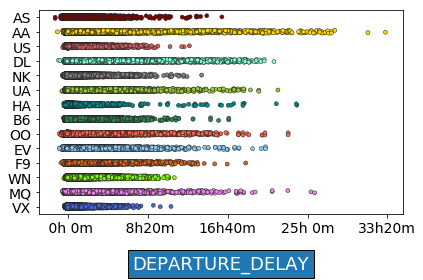

In [43]:
#creating the plot to show departure delays based on airlines. 
## next i want to create a plot to show airports. not only airlines. 

depDelays = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=weatherInduced, linewidth = 0.5,  jitter=True)
plt.setp(depDelays.get_xticklabels(), fontsize=14)
plt.setp(depDelays.get_yticklabels(), fontsize=14)
depDelays.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in depDelays.get_xticks()])
plt.xlabel('DEPARTURE_DELAY', fontsize=18, bbox={'pad':5},
           color='w', labelpad=20)
depDelays.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3) 

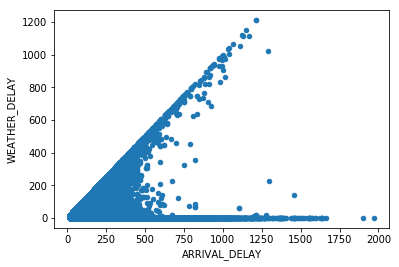

In [50]:
##Viewing the correlation between weather delays and arrival delays 

scatterplot = weatherInduced.plot(kind='scatter', x='ARRIVAL_DELAY', y='WEATHER_DELAY' )

In [117]:
##importing airlines csv 
airlineNames = pd.read_csv('606_airlines.csv')
airlineNames

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [55]:
##realized I should keep the full airline names. so i decided to put them in a list. 
##this will help me later.
Airlines_abbr = airlineNames.set_index('IATA_CODE')['AIRLINE'].to_dict()

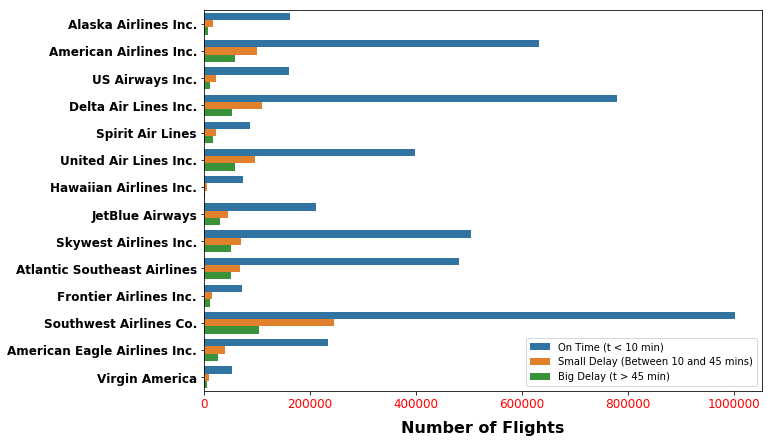

In [56]:
##Function that define how delays are grouped

delay_type = lambda x:((0,1)[x > 10],2)[x > 60]
weatherInduced['Delay_LEVEL'] = weatherInduced['DEPARTURE_DELAY'].apply(delay_type)

#Fig Size
fig = plt.figure(1, figsize=(10,7))
axis = sns.countplot(y="AIRLINE", hue='Delay_LEVEL', data=weatherInduced)

##Using full Airline Names
labels = [Airlines_abbr[item.get_text()] for item in axis.get_yticklabels()]
axis.set_yticklabels(labels)
plt.setp(axis.get_xticklabels(), fontsize=12, weight = 'normal', color = 'r', rotation = 0);
plt.setp(axis.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
axis.yaxis.label.set_visible(False)
plt.xlabel('Number of Flights', fontsize=16, weight = 'bold', labelpad=10)

##Legend
Legand = plt.legend()
Legand.get_texts()[0].set_text('On Time (t < 10 min)')
Legand.get_texts()[1].set_text('Small Delay (Between 10 and 60 mins)')
Legand.get_texts()[2].set_text('Big Delay (t > 60 min)')
plt.show()

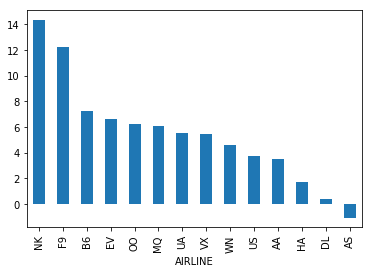

In [123]:
##from Delivery 2
#average arrival_delays by airline

weatherInduced.groupby("AIRLINE").ARRIVAL_DELAY.mean().sort_values(ascending=False)[:14].plot.bar()

## FIRST MODEL

In [229]:
#goal right now is to predict delays on airports. one airlines, all airports. 
#I don't think this will work as well as I want,
#but the goal of nmy first Model is to play around with the dataset.

def merged_delays(weatherInduced, company):
    airportList = weatherInduced[weatherInduced['AIRLINE'] == company]['ORIGIN_AIRPORT'].unique()
    i = 0
    liste_columns = ['AIRPORT_ID', 'depart_min', 'mean']
    for id_airport in airportList:
        test = flight_delays(weatherInduced, company, id_airport, True)
        test.loc[:, 'AIRPORT_ID'] = id_airport
        test = test[liste_columns]
        test.dropna(how = 'any', inplace = True)
        if i == 0:
            newdf = test.copy()
        else:
            newdf = pd.concat([newdf, test], ignore_index = True)
        i += 1    
    return newdf

In [230]:
##I am choosing spirit (NK) airlines because they are known for
##having many delays & not the best service.
company = 'NK'
newdf = merged_delays(weatherInduced, company)
newdf.shape

(477, 3)

In [249]:
#Will be used to change a categorical to int to be used in the ml algorithms
encoder = LabelEncoder()
encodedint = encoder.fit_transform(newdf['AIRPORT_ID'])

In [250]:
#codes and tags of the airports relation. creating a list. 

assignLabels = zip(encodedint, newdf['AIRPORT_ID'])
airportLabels = list(set(list(assignLabels)))
airportLabels.sort(key = lambda x:x[0])

In [251]:
airportLabels[:5]

[(0, 'ACY'), (1, 'ATL'), (2, 'BOS'), (3, 'BQN'), (4, 'BWI')]

In [232]:
#linear regression. MSE = mean square error.

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, Y))

MSE = 74.81211380901829


In [ ]:
### i want to be able to improve my MSE by a lot. It's very bad

In [ ]:
### i will be working on better ways to visualize my results. 